<a href="https://colab.research.google.com/github/mulherinstephen/solutions/blob/main/SharpeRatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Financial Analysis: The Sharpe Ratio**
The Sharpe Ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment. In this project I will use the S&P 500 index as the risk-free benchmark and Apple, Facebook, and Amazon as the stocks of interest.

## **Import Data**

In [11]:
import yfinance as yf
import pandas as pd

#Import Apple, Facebook, and Amazon from Yahoo Finance. Use adjusted close for computation.
ticker_list=['AAPL','FB','AMZN']
stock_data = yf.download(ticker_list,'2018-01-01','2019-08-01')['Adj Close']

#Import S&P 500 index
index_data = yf.download('SPY','2018-01-01','2019-08-01')['Adj Close']

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


## **Exploratory Data Analysis**

In [17]:
stock_data

,AAPL,AMZN,FB
Date,,,
2018-01-02,41.442081,1189.010010,181.419998
2018-01-03,41.434864,1204.199951,184.669998
2018-01-04,41.627323,1209.589966,184.330002
2018-01-05,42.101261,1229.140015,186.850006
2018-01-08,41.944889,1246.869995,188.279999
...,...,...,...
2019-07-25,50.964642,1973.819946,200.710007
2019-07-26,51.141891,1943.050049,199.750000
2019-07-29,51.619480,1912.449951,195.940002


In [15]:
index_data

Date
2018-01-02    254.112717
2018-01-03    255.719986
2018-01-04    256.797821
2018-01-05    258.509186
2018-01-08    258.981873
                 ...    
2019-07-25    291.712341
2019-07-26    293.666748
2019-07-29    293.131927
2019-07-30    292.412415
2019-07-31    289.213287
Name: Adj Close, Length: 397, dtype: float64

In [18]:
stock_data.describe()

,AAPL,AMZN,FB
count,397.000000,397.000000,397.000000
mean,45.774501,1698.278414,172.927103
std,4.863853,190.309536,19.136734
min,34.721451,1189.010010,124.059998
25%,42.065174,1580.949951,161.449997
50%,45.564064,1692.689941,175.039993
75%,49.758747,1863.040039,186.639999
max,56.472256,2039.510010,217.500000


In [19]:
index_data.describe()

count    397.000000
mean     265.744161
std       12.387822
min      225.768829
25%      257.190338
50%      264.744415
75%      275.591797
max      293.666748
Name: Adj Close, dtype: float64

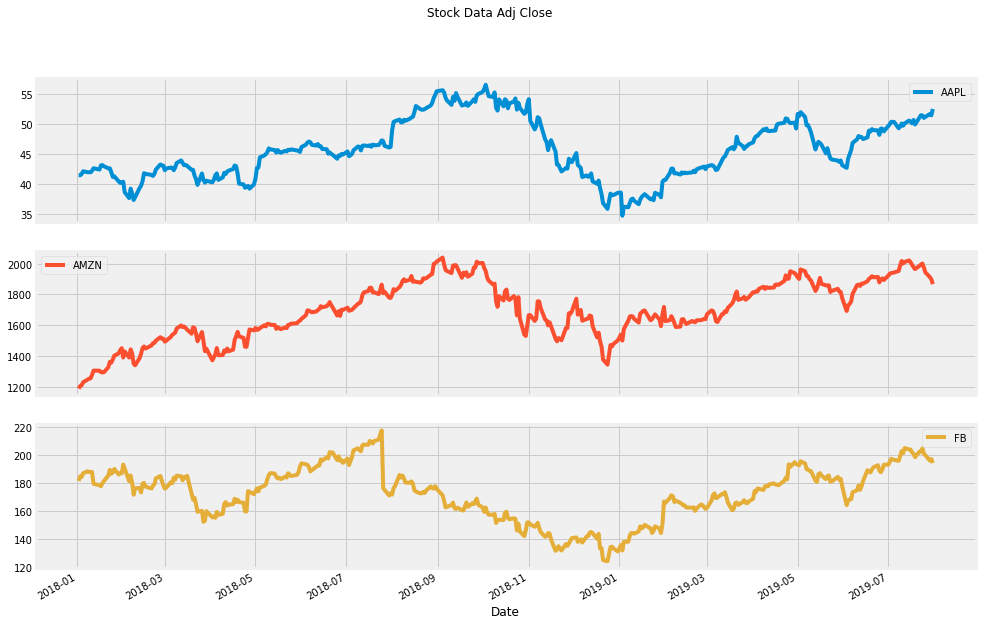

In [24]:
stock_data.plot(subplots=True,title='Stock Data Adj Close', figsize=(15,10));

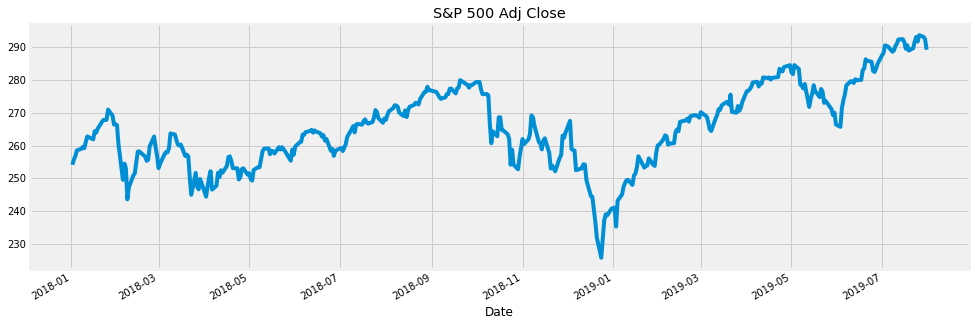

In [25]:
index_data.plot(title='S&P 500 Adj Close', figsize=(15,5));

## **Calculation**

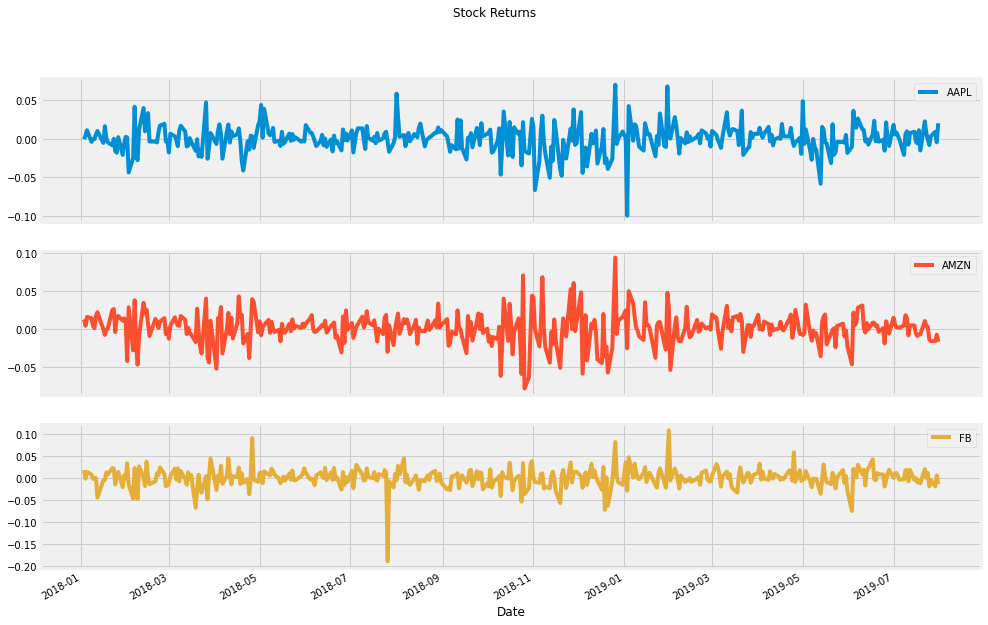

In [26]:
stock_returns=stock_data.pct_change()
stock_returns.plot(subplots=True,title='Stock Returns', figsize=(15,10));

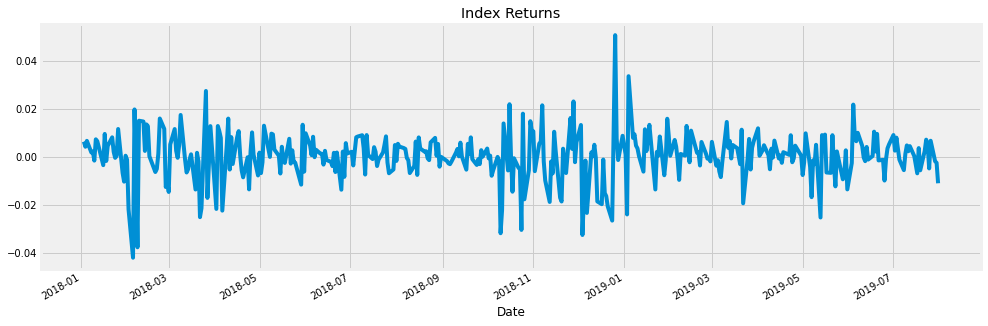

In [27]:
index_returns=index_data.pct_change()
index_returns.plot(title='Index Returns', figsize=(15,5));

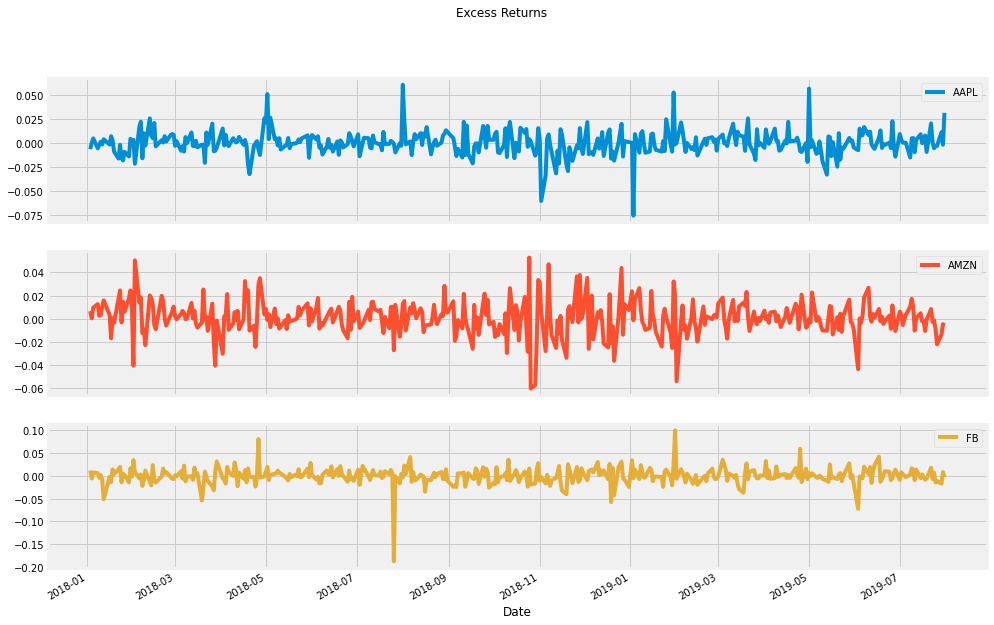

In [29]:
excess_returns = stock_returns.sub(index_returns,axis=0)
excess_returns.plot(subplots=True,title='Excess Returns',figsize=(15,10));

The Sharpe Ratio is annualized by multiplying it by the square root of the number of periods. Number or trading days in a year is 252

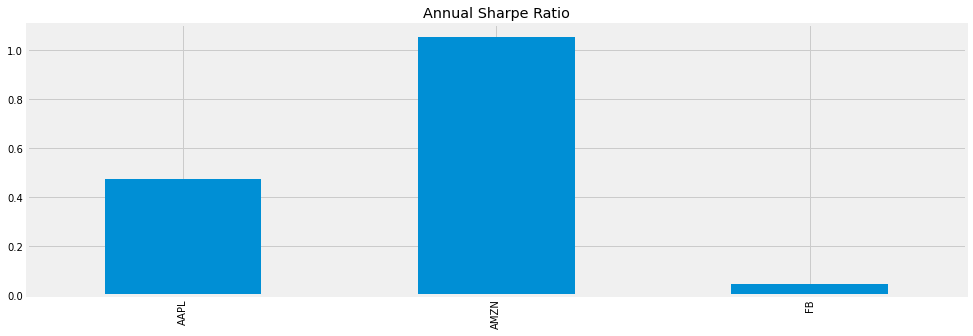

In [38]:
import numpy as np

daily_sharpe_ratio = excess_returns.mean() / excess_returns.std()
annual_sharpe_ratio = daily_sharpe_ratio * np.sqrt(252) 

annual_sharpe_ratio.plot(kind='bar' ,title='Annual Sharpe Ratio', figsize=(15,5));

## **Conclusion**
Investors consider a ratio greater than 1 to be good, greater than 2 to be very good, and greater than 3 to be excellent. Looks like we will recommend Amazon.